In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from scipy import stats

In [10]:
monomers_df = pd.read_csv('switched_monomers_properties.csv')
monomers_df.head()

,Monomer,Monomer HOMO,Monomer LUMO,Monomer relative HOMO,Monomer relative LUMO,Monomer Gap,Monomer E_TS,Oligomer E_TS
0,1002,-8.785468,1.337630,0.175840,-0.397885,10.123098,3.463877,-0.705711
1,413,-7.998868,3.253475,0.962439,1.517960,11.252343,4.620263,0.927454
2,337,-8.201185,0.261447,0.760123,-1.474068,8.462632,3.435267,-0.992091
3,206,-8.368508,0.824369,0.592800,-0.911146,9.192877,3.502443,1.284775
4,1094,-6.845106,2.878611,2.116202,1.143096,9.723716,3.588716,1.334700


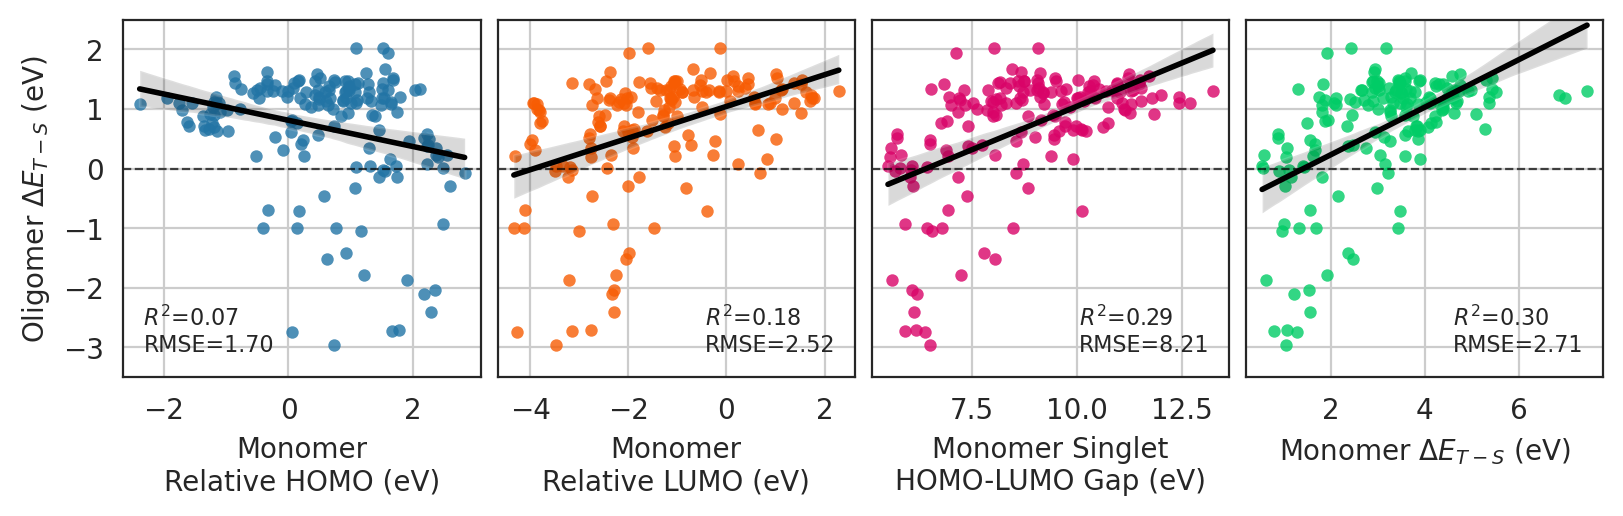

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(8, 2.5), dpi= 200, facecolor='w', edgecolor='k', sharey= True, subplot_kw=dict(box_aspect=1), constrained_layout=True)
sns.set_style("white")

_,_, r_value1, _, _  = stats.linregress(monomers_df['Monomer relative HOMO'],monomers_df['Oligomer E_TS'])
rmse1 = mean_squared_error(monomers_df['Monomer relative HOMO'],monomers_df['Oligomer E_TS'], squared=False)
sns.regplot(data=monomers_df, x='Monomer relative HOMO', y='Oligomer E_TS', ax=ax[0], color='#2274A5', scatter_kws={'lw':0, 's':20}, line_kws={'color': 'k', 'lw':2, 'label':"$R^2$={:.2f}\nRMSE={:.2f}".format(r_value1**2,rmse1)})

_,_, r_value2, _, _ = stats.linregress(monomers_df['Monomer relative LUMO'],monomers_df['Oligomer E_TS'])
rmse2 = mean_squared_error(monomers_df['Monomer relative LUMO'],monomers_df['Oligomer E_TS'], squared=False)
sns.regplot(data=monomers_df, x='Monomer relative LUMO', y='Oligomer E_TS', ax = ax[1], color='#F75C03', scatter_kws={'lw':0, 's':20}, line_kws={'color':'k', 'lw':2, 'label':"$R^2$={:.2f}\nRMSE={:.2f}".format(r_value2**2,rmse2)})

_,_, r_value3, _, _  = stats.linregress(monomers_df['Monomer Gap'],monomers_df['Oligomer E_TS'])
rmse3 = mean_squared_error(monomers_df['Monomer Gap'],monomers_df['Oligomer E_TS'], squared=False)
sns.regplot(data=monomers_df, x='Monomer Gap', y='Oligomer E_TS', ax=ax[2], color='#D90368', scatter_kws={'lw':0, 's':20}, line_kws={'color':'k', 'lw':2, 'label':"$R^2$={:.2f}\nRMSE={:.2f}".format(r_value3**2,rmse3)})

_,_, r_value4, _, _  = stats.linregress(monomers_df['Monomer E_TS'],monomers_df['Oligomer E_TS'])
rmse4 = mean_squared_error(monomers_df['Monomer E_TS'],monomers_df['Oligomer E_TS'], squared=False)
sns.regplot(data=monomers_df, x='Monomer E_TS', y='Oligomer E_TS', ax=ax[3], color='#00CC66', scatter_kws={'lw':0, 's':20}, line_kws={'color':'k', 'lw':2, 'label':"$R^2$={:.2f}\nRMSE={:.2f}".format(r_value4**2,rmse4)})

for l in ax:
    l.grid()
    l.axhline(0, ls = '--', lw = 0.8, c = 'k', zorder = 1, alpha =0.7)
    l.set_ylim(-3.5,2.5)
    l.set(xlabel=None, ylabel=None)
    l.set_anchor('N')

ax[0].legend(fontsize=8, handlelength=0, handletextpad=0, frameon=False, loc=3)
ax[1].legend(fontsize=8, handlelength=0, handletextpad=0, frameon=False, loc=4)
ax[2].legend(fontsize=8, handlelength=0, handletextpad=0, frameon=False, loc=4)
ax[3].legend(fontsize=8, handlelength=0, handletextpad=0, frameon=False, loc=4)

ax[0].set_ylabel(r'Oligomer $\Delta E_{T-S}$ (eV)')

ax[0].set_xlabel('Monomer\nRelative HOMO (eV)', fontsize=10)
ax[1].set_xlabel('Monomer\nRelative LUMO (eV)', fontsize=10)
ax[2].set_xlabel('Monomer Singlet\nHOMO-LUMO Gap (eV)', fontsize=10)
ax[3].set_xlabel(r'Monomer $\Delta E_{T-S}$ (eV)', fontsize=10)

plt.savefig('../figures/switched_monomers_corr_subplots.png')
plt.show()